In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from numpy import linalg

In [295]:
# now load the corner and SIFT features
corner = pd.read_csv("corner.csv")

In [296]:
# put corner for left, center, right images into array form
corner_left_x = corner["corner_left_x"]
corner_left_y = corner["corner_left_y"]
corner_left = np.vstack((np.asarray(list(corner_left_x)), np.asarray(list(corner_left_y))))
corner_left = corner_left.T
corner_center_x = corner["corner_center_x"]
corner_center_y = corner["corner_center_y"]
corner_center = np.vstack((np.asarray(list(corner_center_x)), np.asarray(list(corner_center_y))))
corner_center = corner_center.T
corner_right_x = corner["corner_right_x"]
corner_right_y = corner["corner_right_y"]
corner_right = np.vstack((np.asarray(list(corner_right_x)), np.asarray(list(corner_right_y))))
corner_right = corner_right.T

In [297]:
# obtain the SIFT features for three images and normalize all of them to std=1 and mean =0
from scipy import stats
SIFT_left = pd.read_csv("sift_left.csv").values
SIFT_center = pd.read_csv("sift_center.csv").values
SIFT_right = pd.read_csv("sift_right.csv").values

In [1093]:
# now using adaptive non maximum suppression to obtain best matching features
# do it for left and center images
left_SIFT_index =[]
left_center_SIFT_index =[]
right_SIFT_index =[]
right_center_SIFT_index=[]
center_SIFT_index =[]
## we can use broadcasting here for each point in the left image, for each corner in the left image, exhaustively 
## match it with the center image corners and pick the ones within threshold
for i in range(SIFT_left.shape[0]):
    distance_left_center = np.linalg.norm(SIFT_left[i]-SIFT_center, ord = 2, axis =1)
    index = np.argsort(distance_left_center)
    ratio = distance_left_center[index[0]]/distance_left_center[index[1]]
    if ratio < 0.35:
        left_SIFT_index.append(i)
        left_center_SIFT_index.append(index[0])
print(len(left_center_SIFT_index))
print(len(left_SIFT_index))       
        
## do the same thing for right image corners
for i in range(SIFT_right.shape[0]):
    distance_right_center = np.linalg.norm(SIFT_right[i]-SIFT_center, ord = 2, axis =1)
    index = np.argsort(distance_right_center)
    ratio = distance_right_center[index[0]]/distance_right_center[index[1]]
    if ratio < 0.35:
        right_SIFT_index.append(i)
        right_center_SIFT_index.append(index[0])
print(len(right_center_SIFT_index))
print(len(right_SIFT_index))

10
10
4
4


In [1094]:
# now we pick the harris corner coordinate on the left, center and right images
chosen_point_left =corner_left[left_SIFT_index]
chosen_point_right = corner_right[right_SIFT_index]
chosen_point_left_center = corner_center[left_center_SIFT_index]
chosen_point_right_center = corner_center[right_center_SIFT_index]
print(left_SIFT_index)
print(corner_left.T)
print(chosen_point_left.T)
print("left center sift index")
print(left_center_SIFT_index)
print(corner_center.T)
print(chosen_point_left_center.T)

[17, 49, 52, 55, 63, 100, 127, 149, 160, 168]
[[297 345  72 296 123 305 147  90  82  82 631 150  76  78 308 115 124 607
  311  69 122 111 720 133 360 627 101 626 127 292 607  84  84 720 481 720
  608 638 319 491 321 405 493 317 299 363 342 223 247 344 362 569 626 674
  632 720 247  59 341 417 119 720 492 654 319 553 327 299 233 355 485 221
  418 536   1 597 538 669 406 488 412 672 183 411 126 247 652 643  38 142
  347 222 324 608 226 124 480 236 347 487 331 361 295 253 485 180 246 111
  479 178  59 141 341 352 124 571 498 675 238 299 226 144 180 660 304 112
  413 585 555 404 180 655 144 515 338 404 112 679 100  29 204 484 491 574
   14 625 662  20 227 624 571 626  50 676 665 209  69 239  50  47 567 350
  473 324 229  30 720 322 656 541 539 337 521  24 143 499 405 233 136  65
  184  24 360 139 483  64 647 540 379 176  61 409 406 110 249   2 404 711
  479 535]
 [ 61  46  70  18  74   8 102  15  24  62  48 102  69  68   8  28  39  33
   10  71  71  26 373 106  78   2  19   5 100  86  51  

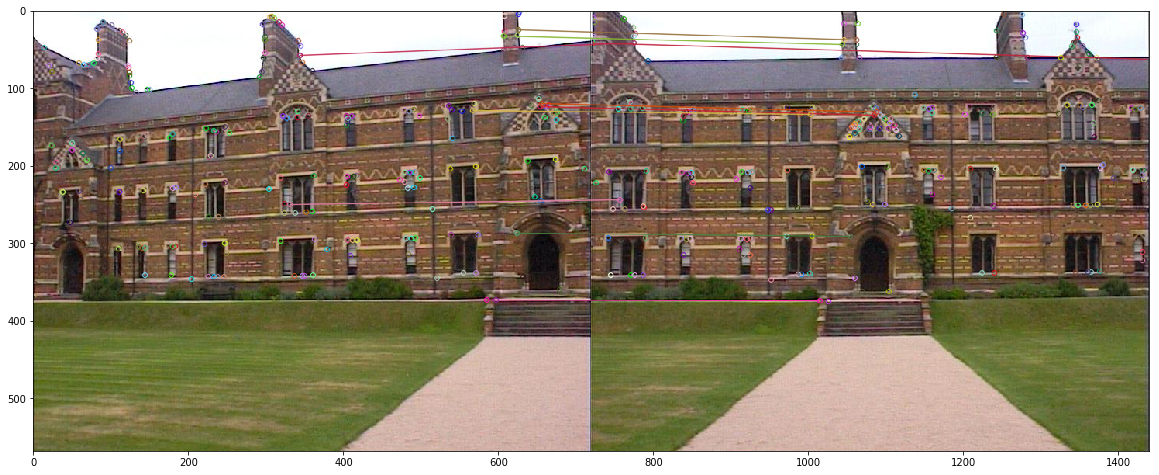

In [1095]:
# use draw match function to plot the correspondence feature points
img_left = mpimg.imread("keble_a.jpg")
img_center = mpimg.imread("keble_b.jpg")
Keypoints1 = []
Keypoints2 = []
DMatches = []

for i in corner_left:
    Keypoints1.append(cv2.KeyPoint(i[0],i[1], _size=1))
for i in corner_center:
    Keypoints2.append(cv2.KeyPoint(i[0],i[1], _size=1))
for i in range(len(left_SIFT_index)):
    distance = np.linalg.norm(corner_left[left_SIFT_index[i]] - corner_center[left_center_SIFT_index[i]], ord =2)
    DMatches.append(cv2.DMatch(_queryIdx =left_SIFT_index[i], _trainIdx = left_center_SIFT_index[i], 
                               _distance =distance))
# now create keypoints1 which is an array of keypoint instances of coordinate for image1 and image2, return value is
## the output image
outImg = cv2.drawMatches(img_left, Keypoints1, img_center, Keypoints2, DMatches, None)
fig = plt.figure(figsize = (20, 20))
plt.imshow(outImg)

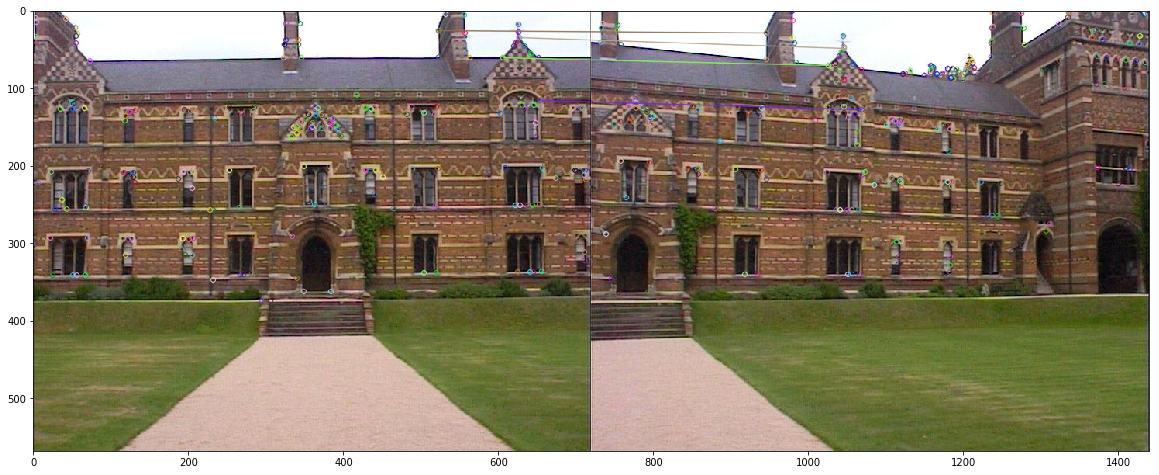

In [1096]:
# do the same thing for the center-right matching
img_right = mpimg.imread("keble_c.jpg")
img_center = mpimg.imread("keble_b.jpg")
Keypoints1 = []
Keypoints2 = []
DMatches = []

for i in corner_center:
    Keypoints1.append(cv2.KeyPoint(i[0],i[1], _size=1))
for i in corner_right:
    Keypoints2.append(cv2.KeyPoint(i[0],i[1], _size=1))
for i in range(len(right_SIFT_index)):
    distance = np.linalg.norm(corner_right[right_SIFT_index[i]] - corner_center[right_center_SIFT_index[i]], ord =2)
    DMatches.append(cv2.DMatch(_trainIdx =right_SIFT_index[i], _queryIdx = right_center_SIFT_index[i], 
                               _distance =distance))
# now create keypoints1 which is an array of keypoint instances of coordinate for image1 and image2, return value is
## the output image
outImg = cv2.drawMatches(img_center, Keypoints1, img_right, Keypoints2,  DMatches, None)
fig = plt.figure(figsize = (20, 20))
plt.imshow(outImg)

In [1097]:
### now robustly estimate homography using RANSAC using sample of 4

# write a function to obatin homography matrix first
def compute_H(im1_pts, im2_pts):
    '''
  This function computes homography matrix from 2D image to another 2D image
  
  Input:
  im1_pts: 2xn 2D image points, either left or right image coordinates
  im2_pts: 2xn 2D image points, center image coordinates
  
  Output:
  P: 3x3 homography matrix, which convert from either left or right image to the center image
  
    '''
  # Your code goes here
    ## both imputs are 2D points, hence need to convert them to homogeneous coordinate first. 
    im1_pts_homogeneous = np.vstack((im1_pts, np.ones(shape =[1, im1_pts.shape[1]])))
    im2_pts_homogeneous = np.vstack((im2_pts, np.ones(shape =[1, im2_pts.shape[1]])))
    row_1 = np.hstack((np.hstack((np.array([0,0,0]), -im1_pts_homogeneous[:,0])), 
                       im2_pts_homogeneous[1,0]*im1_pts_homogeneous[:,0]))
    row_2 = np.hstack((np.hstack((im1_pts_homogeneous[:,0],np.array([0,0,0]))), 
                       -im2_pts_homogeneous[0,0]*im1_pts_homogeneous[:,0]))
    final_matrix = np.vstack((row_1, row_2))
    ## now construct the matrix that is needed to do SVD
    for i in range(1, im1_pts.shape[1]):
        row_1 = np.hstack((np.hstack((np.array([0,0,0]), -im1_pts_homogeneous[:,i])), 
                           im2_pts_homogeneous[1,i]*im1_pts_homogeneous[:,i]))
        row_2 = np.hstack((np.hstack((im1_pts_homogeneous[:,i],np.array([0,0,0]))), 
                           -im2_pts_homogeneous[0,i]*im1_pts_homogeneous[:,i]))
        stacked = np.vstack((row_1, row_2))
        final_matrix = np.vstack((final_matrix, stacked))
        
# svd function return V transpose, hence the last column shoule be the last row of the returned vh
    u, s, vh = np.linalg.svd(final_matrix, full_matrices =1)
    return vh[8,:].reshape(3,3)

In [1213]:
# since the threshold of non maximum suppression has effect on the final chosen points and also the RANSAC algorithms
# several threshold values are chosen here and the resulting chosen points are fed into RANSAC algorithms

left_SIFT_index_total= []
left_center_SIFT_index_total= []
right_SIFT_index_total = []
right_center_SIFT_index_total =[]
ratio_list = [0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]

## we can use broadcasting here for each point in the left image, for each corner in the left image, exhaustively 
## match it with the center image corners and pick the ones within threshold
for ratio_choice in ratio_list:
    left_SIFT_index =[]
    left_center_SIFT_index =[]
    for i in range(SIFT_left.shape[0]):
        distance_left_center = np.linalg.norm(SIFT_left[i]-SIFT_center, ord = 2, axis =1)
        index = np.argsort(distance_left_center)
        ratio = distance_left_center[index[0]]/distance_left_center[index[1]]
        if ratio < ratio_choice:
            left_SIFT_index.append(i)
            left_center_SIFT_index.append(index[0])

    left_SIFT_index_total.append(left_SIFT_index)
    left_center_SIFT_index_total.append(left_center_SIFT_index)
print(len(left_SIFT_index_total))
## do the same thing for right image corners
for ratio_choice in ratio_list:
    right_center_SIFT_index=[]
    right_SIFT_index =[]
    for i in range(SIFT_right.shape[0]):
        distance_right_center = np.linalg.norm(SIFT_right[i]-SIFT_center, ord = 2, axis =1)
        index = np.argsort(distance_right_center)
        ratio = distance_right_center[index[0]]/distance_right_center[index[1]]
        if ratio < ratio_choice:
            right_SIFT_index.append(i)
            right_center_SIFT_index.append(index[0])
    right_SIFT_index_total.append(right_SIFT_index)
    right_center_SIFT_index_total.append(right_center_SIFT_index)

#print(left_SIFT_index_total)
#print(left_center_SIFT_index_total)
#print(right_SIFT_index_total)
#print(right_center_SIFT_index_total)

10


In [1278]:
## it can be seen in the non maximum supression algorithms, there are still several incorrect matches due to the
## ambiguious and repeatitive nature of certain corner, to improve correct matching is the motivation of RANSAC


# now we have function to compute homography matrix, we can implement RANSAC algorithms
 
# randomly pick 4 pairs from the identified pairs using non maximum supression, then pick a threshold, calculate
# H using these 4 pairs, use the obtained H to calculate projection error for the rest of corner pairs, 
# pick the corresponding pairs with the most inliers (euclidean distance blow threshold) and then recalculate the H 
# matrix using the inliers to get a better approximation of H, then use this H to do warpping and finally construct
## moasics

## H matrix seems right but getting the error is not correct here

import random
import math
num_iteration = 3000
# three pixels displacement is allowed as threshold
threshold = 3
max_inliers = 0
final_error = 0
min_final_error = math.inf

'''
print("left sift index")
print(left_SIFT_index)
print("left center sift index")
print(left_center_SIFT_index)
'''
for left_SIFT_index, left_center_SIFT_index in zip(left_SIFT_index_total, left_center_SIFT_index_total):
    chosen_point_left =corner_left[left_SIFT_index]
    #chosen_point_right = corner_right[right_SIFT_index]
    chosen_point_left_center = corner_center[left_center_SIFT_index]
    #chosen_point_right_center = corner_center[right_center_SIFT_index]
    

# for each iteration
    for i in range(num_iteration):
    # sample the index of the left_SIFT_index
        random_index = random.sample(left_SIFT_index, 4)
    #print("random index")
    #print(random_index)
    # paired_left_center_index is the index for the picked corner index in the left image, it is used to get 
    # the paired corner in the center image
        paired_left_center_index = []
        for j in random_index:
            paired_left_center_index.append(left_SIFT_index.index(j))
        # get the corner coordinates for randomly selected 4 pairs
    #print("paired_left_center_index")
    #print(paired_left_center_index)
    #print("chosen point left")
    #print(chosen_point_left)
        paired_left_corners = corner_left[random_index]
    #get the actual index for the center image
        actual_matched_index = [left_center_SIFT_index[i] for i in paired_left_center_index]
    #print("actual matched index for left center")
    #print(actual_matched_index)
    # get the actual matched left center corners
        paired_left_center_corners = corner_center[actual_matched_index]
    #print("chosen_left_point")
    #print(chosen_point_left.T)
    #print("paired left center corners")
    #print(paired_left_center_corners)
    #print("left corners")
    #print(paired_left_corners)

    # now compute homography matrix using these 4 pairs
        H_matrix = compute_H(paired_left_corners.T, paired_left_center_corners.T)
    
        projected=H_matrix.dot(np.vstack((paired_left_corners.T, np.ones(shape = [1,paired_left_corners.shape[0]]))))
    #print(H_matrix.dot(np.vstack((corner_left.T.reshape(2,1), 1)))/H_matrix.dot(np.vstack((corner_left.T.reshape(2,1), 1))))[:,2]
    #print("projected back using H matrix")
    #print(projected/projected[2,:])
    #print("reference")
    #print(paired_left_center_corners.T)
    #print(H_matrix.dot(np.vstack((corner_left[1].T.reshape(2,1), np.ones(shape =[1,1])))))
    #print(corner_center[1])
    
    
    #print("chosen point left")
    #print(chosen_point_left.T)
    #print("chosen point left center")
    #print("chosen point left center")
    #print(chosen_point_left_center.T)
    
    # now project all the left_SIFT_corner to the center image, and calculate the euclidean distance
        homogeneous_left = np.vstack((chosen_point_left.T, np.ones(shape = [1,chosen_point_left.shape[0]])))

        projected = H_matrix.dot(homogeneous_left)
    # now convert to homogeneous by deviding by the last row
        projected_homogeneous = (projected/projected[2,:])
    
        left_center_reference = np.vstack((chosen_point_left_center.T, np.ones(shape = [1, chosen_point_left_center.shape[0]])))
        #print(projected_homogeneous.shape)
        #print(left_center_reference)
        distance = np.linalg.norm(projected_homogeneous - left_center_reference, ord = 2, axis =0)
        num_inliers = len([i for i in distance if i <threshold])
        inliers_mask = distance < threshold
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            inlier_points_left = chosen_point_left[inliers_mask]
            inlier_points_left_center = chosen_point_left_center[inliers_mask]
        #print("number of inliers")
        #print(num_inliers)
    print("maximum number of inliers for all iterations for one threshold")
    print(max_inliers)
    #print(len(inlier_points_left))
    
## now inliers points that satisfy threshold most are identified, we choose the inlier points which the maximum number of inliers
## then we use these points to estimate homography matrix again
    H_RANSAC_left_center = compute_H(inlier_points_left.T, inlier_points_left_center.T)
# now use H_RANSAC to project all chosen left image points to center points and evaluate error
    projected_RANSAC = H_RANSAC_left_center.dot(np.vstack((chosen_point_left.T, np.ones(shape = [1, chosen_point_left.shape[0]]))))
    projected_RANSAC_homogeneous = projected_RANSAC/projected_RANSAC[2,:]
    reference_left_center_homogeneous = np.vstack((chosen_point_left_center.T, np.ones(shape =(1, chosen_point_left_center.shape[0]))))
    #print(reference_left_center_homogeneous)
    #print(projected_RANSAC_homogeneous)
    
    # final error to evaluate is the total mean euclidean distance of projected points and reference points
    final_error = np.linalg.norm(projected_RANSAC_homogeneous-reference_left_center_homogeneous)/projected_RANSAC_homogeneous.shape[1]
    print("final error for one non_maximum_suppression threshold")
    print(final_error)
        
    # now we have the inliers which produce the minimum average euclidean distance, we also have the H_RANSAC 
    # matrix as the optimal estimated homography matrix, we can use it to do wraping and compositing
print("final max number of inliers")
print(max_inliers)
print("final estimated homography matrix using RANSAC")  
print(H_RANSAC_left_center)
    

maximum number of inliers for all iterations for one threshold
9
final error for one non_maximum_suppression threshold
29.33199357035425
maximum number of inliers for all iterations for one threshold
11
final error for one non_maximum_suppression threshold
24.450778313296507
maximum number of inliers for all iterations for one threshold
13
final error for one non_maximum_suppression threshold
28.981194756896688
maximum number of inliers for all iterations for one threshold
15
final error for one non_maximum_suppression threshold
29.14843492348154
maximum number of inliers for all iterations for one threshold
17
final error for one non_maximum_suppression threshold
26.222238283385014
maximum number of inliers for all iterations for one threshold
26
final error for one non_maximum_suppression threshold
22.10334199199497
maximum number of inliers for all iterations for one threshold
32
final error for one non_maximum_suppression threshold
31.810348931066343
maximum number of inliers for a

In [1279]:
# do the same thing for right left 
import random
import math
num_iteration = 3000
# three pixels displacement is allowed as threshold
threshold = 3
max_inliers = 0
final_error = 0
min_final_error = math.inf


for right_SIFT_index, right_center_SIFT_index in zip(right_SIFT_index_total, right_center_SIFT_index_total):
    #chosen_point_left =corner_left[left_SIFT_index]
    chosen_point_right = corner_right[right_SIFT_index]
    #chosen_point_left_center = corner_center[left_center_SIFT_index]
    chosen_point_right_center = corner_center[right_center_SIFT_index]

    print(right_SIFT_index) 

# for each iteration
    for i in range(num_iteration):
    # sample the index of the left_SIFT_index
        random_index = random.sample(right_SIFT_index, 4)
    # paired_left_center_index is the index for the picked corner index in the left image, it is used to get 
    # the paired corner in the center image
        paired_right_center_index = []
        for j in random_index:
            paired_right_center_index.append(right_SIFT_index.index(j))
        # get the corner coordinates for randomly selected 4 pairs
        paired_right_corners = corner_right[random_index]
    #get the actual index for the center image
        actual_matched_index = [right_center_SIFT_index[i] for i in paired_right_center_index]
    # get the actual matched left center corners
        paired_right_center_corners = corner_center[actual_matched_index]

    # now compute homography matrix using these 4 pairs
        H_matrix = compute_H(paired_right_corners.T, paired_right_center_corners.T)
    
        projected=H_matrix.dot(np.vstack((paired_right_corners.T, np.ones(shape = [1,paired_right_corners.shape[0]]))))
    
    # now project all the left_SIFT_corner to the center image, and calculate the euclidean distance
        homogeneous_right = np.vstack((chosen_point_right.T, np.ones(shape = [1,chosen_point_right.shape[0]])))

        projected = H_matrix.dot(homogeneous_right)
    # now convert to homogeneous by deviding by the last row
        projected_homogeneous = (projected/projected[2,:])
    
        right_center_reference = np.vstack((chosen_point_right_center.T, np.ones(shape = [1, chosen_point_right_center.shape[0]])))
        distance = np.linalg.norm(projected_homogeneous - right_center_reference, ord = 2, axis =0)
        num_inliers = len([i for i in distance if i <threshold])
        inliers_mask = distance < threshold
        if num_inliers > max_inliers:
            max_inliers = num_inliers
            inlier_points_right = chosen_point_right[inliers_mask]
            inlier_points_right_center = chosen_point_right_center[inliers_mask]

    print("maximum number of inliers for all iterations for one threshold")
    print(max_inliers)
    
## now inliers points that satisfy threshold most are identified, we choose the inlier points which the maximum number of inliers
## then we use these points to estimate homography matrix again
    H_RANSAC_right_center = compute_H(inlier_points_right.T, inlier_points_right_center.T)
# now use H_RANSAC to project all chosen left image points to center points and evaluate error
    projected_RANSAC = H_RANSAC_right_center.dot(np.vstack((chosen_point_right.T, np.ones(shape = [1, chosen_point_right.shape[0]]))))
    projected_RANSAC_homogeneous = projected_RANSAC/projected_RANSAC[2,:]
    reference_right_center_homogeneous = np.vstack((chosen_point_right_center.T, np.ones(shape =(1, chosen_point_right_center.shape[0]))))
    
    # final error to evaluate is the total mean euclidean distance of projected points and reference points
    final_error = np.linalg.norm(projected_RANSAC_homogeneous-reference_right_center_homogeneous)/projected_RANSAC_homogeneous.shape[1]
    print("final error for one non_maximum_suppression threshold")
    print(final_error)
        
    # now we have the inliers which produce the minimum average euclidean distance, we also have the H_RANSAC 
    # matrix as the optimal estimated homography matrix, we can use it to do wraping and compositing
print("final max number of inliers")
print(max_inliers)
print("final estimated homography matrix using RANSAC")  
print(H_RANSAC_right_center)

[14, 30, 54, 140]
maximum number of inliers for all iterations for one threshold
4
final error for one non_maximum_suppression threshold
2.3163574506890899e-10
[14, 30, 51, 54, 75, 101, 140, 161, 176, 185, 189]
maximum number of inliers for all iterations for one threshold
11
final error for one non_maximum_suppression threshold
0.13419581652835827
[10, 14, 30, 51, 54, 60, 75, 101, 117, 126, 132, 140, 147, 148, 161, 176, 185, 188, 189]
maximum number of inliers for all iterations for one threshold
19
final error for one non_maximum_suppression threshold
0.14767470938532362
[10, 14, 17, 30, 51, 53, 54, 60, 69, 75, 78, 98, 101, 117, 126, 132, 140, 147, 148, 149, 154, 161, 167, 176, 178, 185, 188, 189]
maximum number of inliers for all iterations for one threshold
28
final error for one non_maximum_suppression threshold
0.14833488340050843
[10, 14, 17, 30, 32, 51, 53, 54, 60, 69, 75, 78, 98, 101, 117, 126, 132, 140, 147, 148, 149, 154, 161, 167, 176, 178, 184, 185, 188, 189, 193]
maximum 

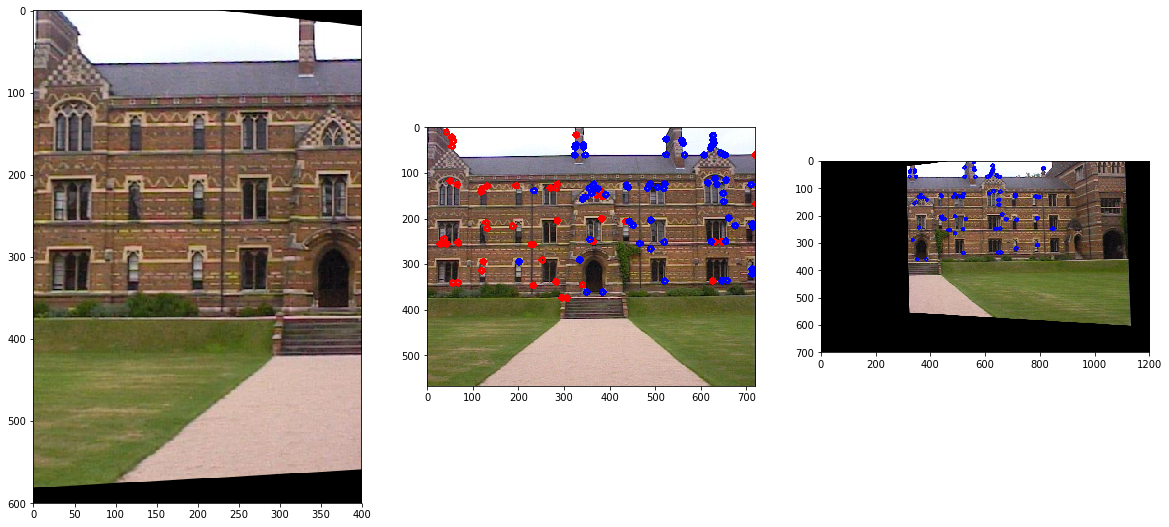

In [1327]:
# now we have the estimated homography matrix for both left-center and right-center, we can use it to do warping and compositing
# save the projected images and stitch them together
img_left = mpimg.imread("keble_a.jpg")
from PIL import Image
plt.figure(figsize =(20,15))
projected_left_center = cv2.warpPerspective(img_left, H_RANSAC_left_center, (400, 600))
projected_right_center = cv2.warpPerspective(img_right, H_RANSAC_right_center, (1200, 700))
plt.subplot(1,3,1)
plt.imshow(projected_left_center)
plt.subplot(1,3,2)
plt.imshow(img_center)
plt.subplot(1,3,3)
plt.imshow(projected_right_center)
from PIL import Image
im = Image.fromarray(projected_left_center)
im.save("projected_left_center.jpg")
im = Image.fromarray(projected_right_center)
im.save("projected_right_center.jpg")

